results from static simulation using reframed and SteadyCom

# Monoculture production

look at the theoretical maximal product formulation in the monoculture

In [1]:
from reframed import Community, Environment
from reframed import load_cbmodel, FBA, plot_flux_envelope
from config import ROOT_DIR

mra_path = ROOT_DIR / "community_modelling" / "GEMs" / "MRA.xml"
MRA = load_cbmodel(str(mra_path), flavor="bigg")

In [5]:
medium = Environment.from_model(MRA).apply(MRA, exclusive=True, inplace=False)
medium["R_EX_phe__L_e"] = (-10, float("inf")) #adding phenylalanine to the media since pheA is knocked out

In [6]:
FBA(MRA, constraints=medium)

Objective: 0.9037654323222015
Status: Optimal

<AxesSubplot: xlabel='E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate', ylabel='Rosmarinic acid exchange'>

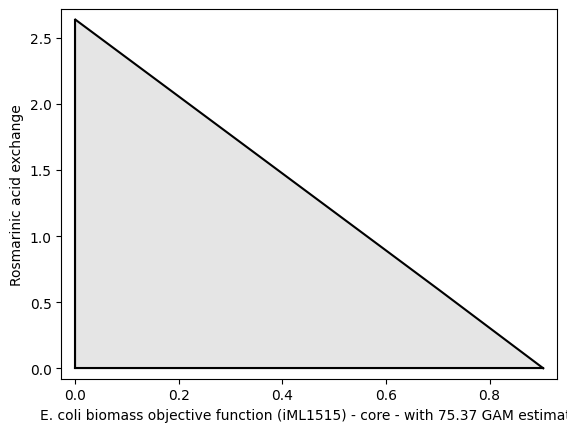

In [7]:
plot_flux_envelope(MRA, MRA.biomass_reaction, 'R_EX_rosma_e', constraints=medium)

In [10]:
theoretical_RA_opt = FBA(MRA, constraints=medium, objective='R_EX_rosma_e')
print(theoretical_RA_opt)

Objective: 2.639598438371436
Status: Optimal



In [12]:
from GEM_eval import saa_loop

saa_loop(theoretical_RA_opt, community=False)

False